### 데이터 불러오기

In [4]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [5]:
# train, test 데이터를 불러옵니다.
path = '/Users/yniyunj/Desktop/AI/250115-EVpriceprediction'
train = pd.read_csv(path+'/open/train.csv')
test = pd.read_csv(path+'/open/test.csv')

In [6]:
train

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02
...,...,...,...,...,...,...,...,...,...,...,...
7492,TRAIN_7492,H사,ION5,Brand New,NaN,AWD,3773,10,No,0,35.95
7493,TRAIN_7493,B사,i3,Pre-Owned,46.000,RWD,135411,2,No,0,23.40
7494,TRAIN_7494,P사,TayCT,Brand New,NaN,AWD,1363,2,No,0,120.00
7495,TRAIN_7495,B사,i3,Nearly New,56.000,RWD,39445,6,No,2,24.00


### 데이터 살펴보기

In [7]:
def plot_histogram(data, columns_to_plot, cols=2, figsize=(10, 5)):
    # 해당 열이 데이터 내 존재하는 지 확인합니다.
    valid_columns = [col for col in columns_to_plot if col in data.columns]
    if not valid_columns:
        raise ValueError("해당 열이 존재하지 않습니다.")
    
    # 서브플롯을 생성하기 위해 행과 열의 수를 확인합니다.
    num_vars = len(valid_columns)
    rows = math.ceil(num_vars / cols)
    
    # 서브플롯을 생성합니다.
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()  
    
    for i, col in enumerate(valid_columns):
        sns.histplot(x=data[col], ax=axes[i])
        axes[i].set_title(col)
    
    # 빈 서브플롯을 삭제합니다.
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipykernel_52130/3110698810.py:23: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipykernel_52130/3110698810.py:23: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipykernel_52130/3110698810.py:23: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipykernel_52130/3110698810.py:23: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipykernel_52130/3110698810.py:23: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/yniyunj/.pyenv/versions/3.10.6/lib/python3.10/

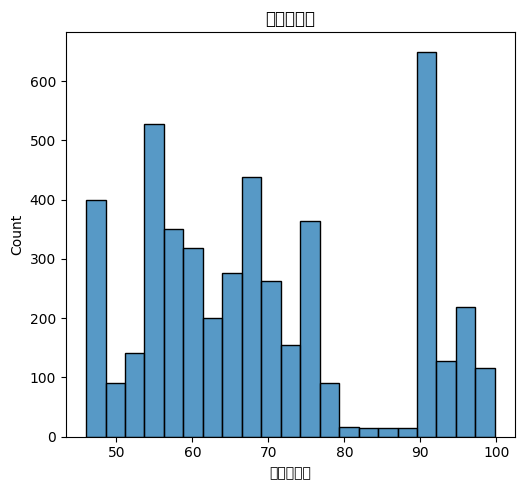

In [8]:
# 그래프를 생성할 열을 담은 리스트 입니다.
columns_to_plot = ['배터리용량']

# 선언한 함수를 사용하여 그래프를 생성합니다.
plot_histogram(data=train, columns_to_plot=columns_to_plot, cols=2, figsize=(10, 5))

In [9]:
def plot_categorical(data, columns_to_plot, cols=3, figsize=(10, 5)): 
    # 해당열이 데이터 내 존재하는지 확인합니다.
    valid_columns = [col for col in columns_to_plot if col in data.columns]
    if not valid_columns:
        raise ValueError("해당 열이 존재하지 않습니다.")
    
    # 서브플롯을 생성하기 위해 행과 열의 수를 확인합니다.
    num_vars = len(valid_columns)
    rows = math.ceil(num_vars / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()  
    
    for i, col in enumerate(valid_columns):
        sns.countplot(x=data[col], ax=axes[i], palette="viridis", order=data[col].value_counts().index)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)
    
    # 빈 서비플롯을 삭제합니다.
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipykernel_52130/491866729.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], ax=axes[i], palette="viridis", order=data[col].value_counts().index)
/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipykernel_52130/491866729.py:23: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipykernel_52130/491866729.py:23: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipykernel_52130/491866729.py:23: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipykernel_52130/491866

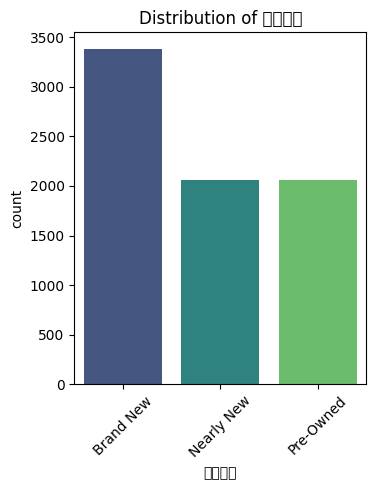

In [10]:
# 그래프를 생성할 열을 담은 리스트 입니다.
columns_to_plot = ['차량상태']

# 선언한 함수를 사용하여 그래프를 생성합니다.
plot_categorical(data=train, columns_to_plot=columns_to_plot)

/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipykernel_52130/3490898345.py:30: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipykernel_52130/3490898345.py:30: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipykernel_52130/3490898345.py:30: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipykernel_52130/3490898345.py:30: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipykernel_52130/3490898345.py:30: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipyke

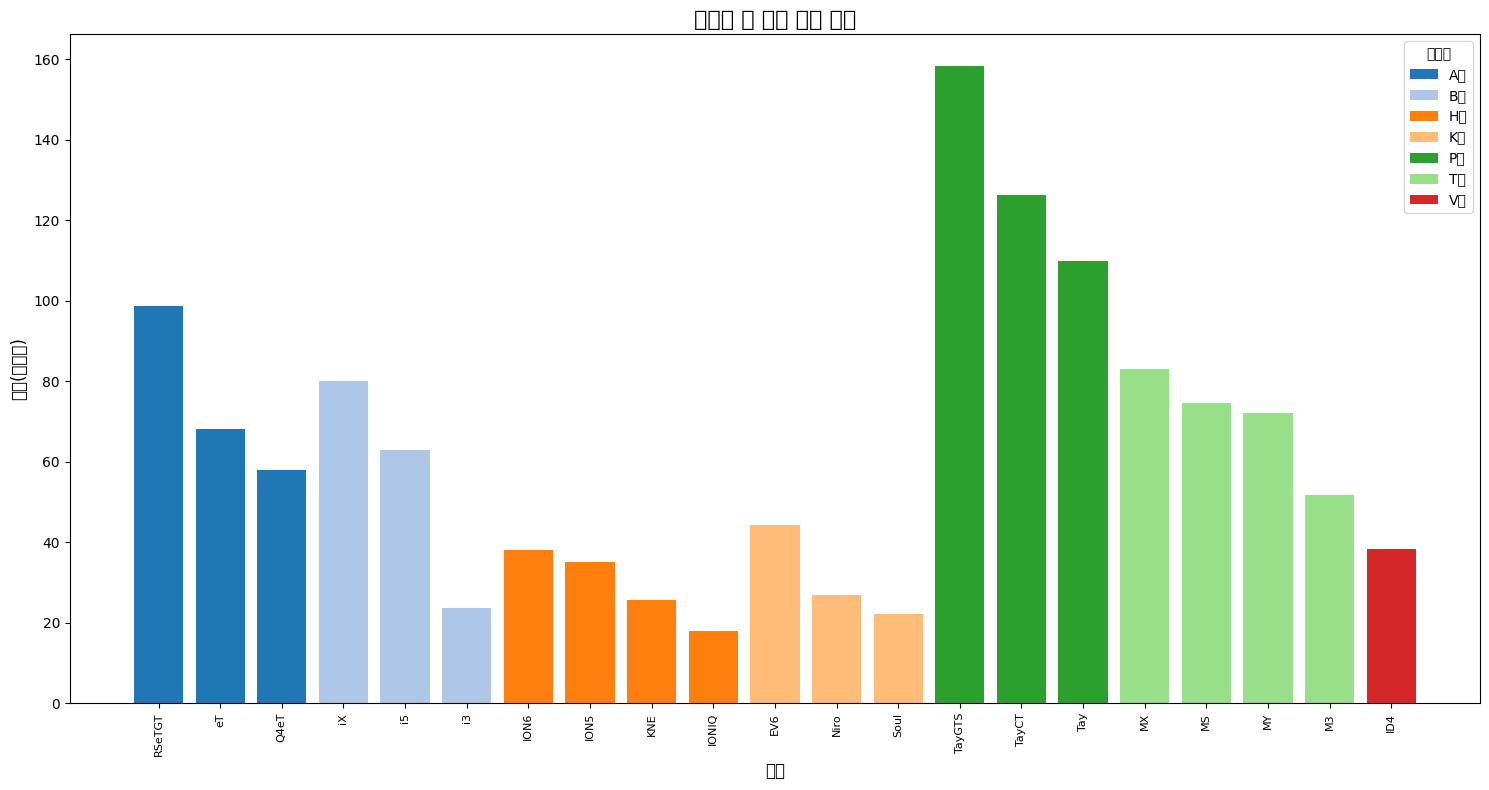

In [11]:
# 제조사의 모델별 가격의 평균으로 그룹화 합니다.
grouped_data = train.groupby(['제조사', '모델'])['가격(백만원)'].mean().reset_index()

# 더 나은 그래프를 그리기 위해 제조사별로 정렬합니다.
grouped_data = grouped_data.sort_values(by=['제조사', '가격(백만원)'], ascending=[True, False])

# 그래프 전체의 크기를 나타냅니다.
plt.figure(figsize=(15, 8))

# 유니크한 제조사 명을 정의합니다.
brands = grouped_data['제조사'].unique()
colors = plt.cm.tab20.colors[:len(brands)]

# 제조사별로 모델의 가격을 바 그래프 형태로 나타냅니다.
for i, brand in enumerate(brands):
    brand_data = grouped_data[grouped_data['제조사'] == brand]
    plt.bar(
        brand_data['모델'],
        brand_data['가격(백만원)'],
        label=brand,
        color=colors[i % len(colors)]
    )

# 그래프의 형태를 정의합니다.
plt.title('제조사 별 모델 가격 분포', fontsize=16)
plt.xlabel('모델', fontsize=12)
plt.ylabel('가격(백만원)', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.legend(title='제조사', fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

### 데이터 전처리

In [12]:
# 데이터 내 결측치를 확인합니다.
train.isna().sum()

ID             0
제조사            0
모델             0
차량상태           0
배터리용량       2711
구동방식           0
주행거리(km)       0
보증기간(년)        0
사고이력           0
연식(년)          0
가격(백만원)        0
dtype: int64

In [13]:
# 데이터 내 결측치를 train데이터의 평균값을 사용하여 대체합니다.
train['배터리용량'].fillna(train['배터리용량'].mean(),inplace=True)
test['배터리용량'].fillna(train['배터리용량'].mean(),inplace=True)

/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipykernel_52130/2343584787.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['배터리용량'].fillna(train['배터리용량'].mean(),inplace=True)
/var/folders/2k/10fc4g4d33q5h9qc2fn4wk6m0000gn/T/ipykernel_52130/2343584787.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [14]:
# 학습과 예측을 위해 데이터를 분리합니다.
x_train = train.drop(['ID', '가격(백만원)'], axis = 1)
y_train = train['가격(백만원)']

x_test = test.drop('ID', axis = 1)

In [15]:
# 범주형 변수에 대해 레이블 인코딩을 적용합니다.
categorical_features = [col for col in x_train.columns if x_train[col].dtype == 'object']

for i in categorical_features:
    le = LabelEncoder()
    le=le.fit(x_train[i]) 
    x_train[i]=le.transform(x_train[i])
    
    for case in np.unique(x_test[i]):
        if case not in le.classes_: 
            le.classes_ = np.append(le.classes_, case) 
    x_test[i]=le.transform(x_test[i])
    
display(x_train.head(3))

,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,4,16,1,86.077,0,13642,0,0,2
1,3,10,1,56.000,1,10199,6,0,0
2,0,17,0,91.200,0,2361,7,0,0


### 학습 및 예측하기

In [16]:
# 모델을 선언하고, 학습을 진행합니다.
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [17]:
# 예측을 수행합니다.
pred = model.predict(x_test)

### 제출하기

In [18]:
# sample_submission 파일을 불러옵니다.
submit = pd.read_csv(path+'/open/sample_submission.csv')

In [19]:
# 예측한 결과를 submit에 저장합니다.
submit['가격(백만원)'] = pred
submit.head()

,ID,가격(백만원)
0,TEST_000,130.84
1,TEST_001,79.26
2,TEST_002,64.70
3,TEST_003,35.00
4,TEST_004,47.80


In [21]:
# 제출을 위해 baseline_submission.csv란 이름으로 CSV 파일을 저장합니다.
submit.to_csv(path+'/submission/240115-pred01.csv',index=False)